# 1. RNN_hello_many2many

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
text = "hello"

In [3]:
char_vocab = sorted(list(set(text)))
vocab_size=len(char_vocab)
print(char_vocab)
print ('글자 집합의 크기 : {}'.format(vocab_size))


['e', 'h', 'l', 'o']
글자 집합의 크기 : 4


In [4]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 글자에 고유한 정수 인덱스 부여
print(char_to_index)

{'e': 0, 'h': 1, 'l': 2, 'o': 3}


In [5]:
_tmp = []
for ch in text:
    _tmp.append(char_to_index[ch])
_tmp

[1, 0, 2, 2, 3]

In [6]:
train_X = [_tmp[:4]]
train_y = [_tmp[1:]]
train_X, train_y

([[1, 0, 2, 2]], [[0, 2, 2, 3]])

In [7]:
seq_length = 4
n_samples = 1

In [8]:
print(train_X, train_y)


[[1, 0, 2, 2]] [[0, 2, 2, 3]]


In [9]:
train_X = to_categorical(train_X)
train_y = to_categorical(train_y)
print(train_X.shape)
print(train_X)
print(train_y)

(1, 4, 3)
[[[0. 1. 0.]
  [1. 0. 0.]
  [0. 0. 1.]
  [0. 0. 1.]]]
[[[1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]


In [10]:
train_X.shape[2], train_y.shape[2]

(3, 4)

In [11]:
input_size = train_X.shape[2]
output_size = train_y.shape[2]

In [12]:
# hidden node 크기는 마음대로 정할 수 있다.
n_hidden = 5
model = Sequential()
model.add(layers.SimpleRNN(n_hidden, input_shape=(None, input_size), return_sequences=True))
model.add(layers.TimeDistributed(layers.Dense(output_size, activation='softmax')))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs = 200, verbose=2)

Epoch 1/200
1/1 - 2s - loss: 1.2396 - accuracy: 0.5000 - 2s/epoch - 2s/step
Epoch 2/200
1/1 - 0s - loss: 1.2331 - accuracy: 0.5000 - 12ms/epoch - 12ms/step
Epoch 3/200
1/1 - 0s - loss: 1.2266 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 4/200
1/1 - 0s - loss: 1.2202 - accuracy: 0.5000 - 19ms/epoch - 19ms/step
Epoch 5/200
1/1 - 0s - loss: 1.2138 - accuracy: 0.5000 - 19ms/epoch - 19ms/step
Epoch 6/200
1/1 - 0s - loss: 1.2074 - accuracy: 0.5000 - 19ms/epoch - 19ms/step
Epoch 7/200
1/1 - 0s - loss: 1.2011 - accuracy: 0.5000 - 13ms/epoch - 13ms/step
Epoch 8/200
1/1 - 0s - loss: 1.1948 - accuracy: 0.5000 - 14ms/epoch - 14ms/step
Epoch 9/200
1/1 - 0s - loss: 1.1885 - accuracy: 0.5000 - 14ms/epoch - 14ms/step
Epoch 10/200
1/1 - 0s - loss: 1.1823 - accuracy: 0.5000 - 14ms/epoch - 14ms/step
Epoch 11/200
1/1 - 0s - loss: 1.1761 - accuracy: 0.5000 - 9ms/epoch - 9ms/step
Epoch 12/200
1/1 - 0s - loss: 1.1699 - accuracy: 0.5000 - 12ms/epoch - 12ms/step
Epoch 13/200
1/1 - 0s - loss: 1.1638 - accu

In [14]:
pred = model.predict(train_X)
pred

1/1 [==============================] - 0s 182ms/step


array([[[0.4714184 , 0.1606481 , 0.184419  , 0.18351445],
        [0.07516636, 0.11679128, 0.76720136, 0.040841  ],
        [0.04194473, 0.08124532, 0.73484653, 0.14196353],
        [0.14141276, 0.10299446, 0.15451571, 0.601077  ]]], dtype=float32)

In [15]:
np.argmax(pred, 2)

array([[0, 2, 2, 3]])

# 2. RNN_many2one

In [16]:
# setup
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences


### Prepairing dataset

In [17]:
# example data
words = ['good', 'bad', 'worse', 'so good']
y_data = [[1],[0],[0],[1]]

# creating a token dictionary
char_set = ['<pad>'] + sorted(list(set(''.join(words))))
idx2char = {idx : char for idx, char in enumerate(char_set)}
char2idx = {char : idx for idx, char in enumerate(char_set)}

print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', 'a', 'b', 'd', 'e', 'g', 'o', 'r', 's', 'w']
{0: '<pad>', 1: ' ', 2: 'a', 3: 'b', 4: 'd', 5: 'e', 6: 'g', 7: 'o', 8: 'r', 9: 's', 10: 'w'}
{'<pad>': 0, ' ': 1, 'a': 2, 'b': 3, 'd': 4, 'e': 5, 'g': 6, 'o': 7, 'r': 8, 's': 9, 'w': 10}


In [18]:
# converting sequence of tokens to sequence of indices
x_data = list(map(lambda word : [char2idx.get(char) for char in word], words))
x_data_len = list(map(lambda word : len(word), x_data))

print(x_data)
print(x_data_len)

[[6, 7, 7, 4], [3, 2, 4], [10, 7, 8, 9, 5], [9, 7, 1, 6, 7, 7, 4]]
[4, 3, 5, 7]


In [19]:
# padding the sequence of indices
max_sequence = 10
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence,
                       padding = 'post', truncating = 'post')
y_data = np.array(y_data)
# checking data
print(x_data)
print(y_data)

[[ 6  7  7  4  0  0  0  0  0  0]
 [ 3  2  4  0  0  0  0  0  0  0]
 [10  7  8  9  5  0  0  0  0  0]
 [ 9  7  1  6  7  7  4  0  0  0]]
[[1]
 [0]
 [0]
 [1]]


### Creating model

In [20]:
# creating simple rnn for "many to one" classification
input_dim = len(char2idx)
output_dim = len(char2idx)-2  # 조금작게
hidden_size = 10
num_classes = 2 # 0일 확률, 1일 확률을 계산

model = Sequential()
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim,
                           mask_zero=True, input_length=max_sequence,
                           embeddings_initializer='uniform'))
#                           embeddings_initializer=keras.initializers.Constant(one_hot)))
model.add(layers.SimpleRNN(units=hidden_size))
model.add(layers.Dense(units=num_classes))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 9)             99        
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10)                200       
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [22]:
x_data

array([[ 6,  7,  7,  4,  0,  0,  0,  0,  0,  0],
       [ 3,  2,  4,  0,  0,  0,  0,  0,  0,  0],
       [10,  7,  8,  9,  5,  0,  0,  0,  0,  0],
       [ 9,  7,  1,  6,  7,  7,  4,  0,  0,  0]], dtype=int32)

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_data, y_data, epochs=300)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 1.0064 - accuracy: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 0.6623 - accuracy: 0.2500
Epoch 3/300
1/1 [==============================] - 0s 14ms/step - loss: 0.5124 - accuracy: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 14ms/step - loss: 0.4481 - accuracy: 0.5000
Epoch 5/300
1/1 [==============================] - 0s 18ms/step - loss: 0.4115 - accuracy: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 20ms/step - loss: 2.8942 - accuracy: 0.5000
Epoch 7/300
1/1 [==============================] - 0s 17ms/step - loss: 0.3653 - accuracy: 0.5000
Epoch 8/300
1/1 [==============================] - 0s 23ms/step - loss: 0.3499 - accuracy: 0.5000
Epoch 9/300
1/1 [==============================] - 0s 19ms/step - loss: 0.3466 - accuracy: 0.5000
Epoch 10/300
1/1 [==============================] - 0s 17ms/step - loss: 0.3466 - accuracy: 0.5000
Epoch 11/300
1/1 

In [24]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print(y_data, yhat)

1/1 [==============================] - 0s 181ms/step
[[1]
 [0]
 [0]
 [1]] [1 0 0 1]


# 3. RNN_longchar_many2many_TF2

In [25]:
import numpy as np
import urllib.request
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

In [26]:
lines = ["if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea."]

In [27]:
text = ' '.join(lines)
print('문자열의 길이 또는 총 글자의 개수: %d' % len(text))

문자열의 길이 또는 총 글자의 개수: 180


In [28]:
print(text)

if you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.


In [29]:
char_vocab = sorted(list(set(text)))
vocab_size=len(char_vocab)
print ('글자 집합의 크기 : {}'.format(vocab_size))

글자 집합의 크기 : 25


In [30]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 글자에 고유한 정수 인덱스 부여
print(char_to_index)

{' ': 0, "'": 1, ',': 2, '.': 3, 'a': 4, 'b': 5, 'c': 6, 'd': 7, 'e': 8, 'f': 9, 'g': 10, 'h': 11, 'i': 12, 'k': 13, 'l': 14, 'm': 15, 'n': 16, 'o': 17, 'p': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'w': 23, 'y': 24}


In [31]:
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key

In [32]:
seq_length = 10 # 문장의 길이는 10으로 한다.
n_samples = int(np.floor((len(text) - 1) / seq_length)) # 문자열을 10등분한다. 그러면 즉, 총 샘플의 개수
print ('문장 샘플의 수 : {}'.format(n_samples))

문장 샘플의 수 : 17


In [33]:
_tmp = []

for i in range(n_samples): 
    X_sample = text[i * seq_length: (i + 1) * seq_length]
    # 0:10 -> 10:20 -> 20:30로 loop를 돌면서 문장 샘플을 1개씩 가져온다.
    X_encoded = [char_to_index[c] for c in X_sample] # 하나의 문장 샘플에 대해서 정수 인코딩
    _tmp.append(X_encoded)

In [34]:
train_X = _tmp[:-1]
train_y = _tmp[1:]

In [35]:
print(train_X)
print(train_y)

[[12, 9, 0, 24, 17, 22, 0, 23, 4, 16], [21, 0, 21, 17, 0, 5, 22, 12, 14, 7], [0, 4, 0, 20, 11, 12, 18, 2, 0, 7], [17, 16, 1, 21, 0, 7, 19, 22, 15, 0], [22, 18, 0, 18, 8, 17, 18, 14, 8, 0], [21, 17, 10, 8, 21, 11, 8, 19, 0, 21], [17, 0, 6, 17, 14, 14, 8, 6, 21, 0], [23, 17, 17, 7, 0, 4, 16, 7, 0, 7], [17, 16, 1, 21, 0, 4, 20, 20, 12, 10], [16, 0, 21, 11, 8, 15, 0, 21, 4, 20], [13, 20, 0, 4, 16, 7, 0, 23, 17, 19], [13, 2, 0, 5, 22, 21, 0, 19, 4, 21], [11, 8, 19, 0, 21, 8, 4, 6, 11, 0], [21, 11, 8, 15, 0, 21, 17, 0, 14, 17], [16, 10, 0, 9, 17, 19, 0, 21, 11, 8], [0, 8, 16, 7, 14, 8, 20, 20, 0, 12]]
[[21, 0, 21, 17, 0, 5, 22, 12, 14, 7], [0, 4, 0, 20, 11, 12, 18, 2, 0, 7], [17, 16, 1, 21, 0, 7, 19, 22, 15, 0], [22, 18, 0, 18, 8, 17, 18, 14, 8, 0], [21, 17, 10, 8, 21, 11, 8, 19, 0, 21], [17, 0, 6, 17, 14, 14, 8, 6, 21, 0], [23, 17, 17, 7, 0, 4, 16, 7, 0, 7], [17, 16, 1, 21, 0, 4, 20, 20, 12, 10], [16, 0, 21, 11, 8, 15, 0, 21, 4, 20], [13, 20, 0, 4, 16, 7, 0, 23, 17, 19], [13, 2, 0, 5, 22, 2

In [36]:
encoded_X = to_categorical(train_X)
encoded_y = to_categorical(train_y)

In [37]:
print('encoded_X의 크기(shape) : {}'.format(encoded_X.shape)) # 원-핫 인코딩
print('encoded_y의 크기(shape) : {}'.format(encoded_y.shape)) # 원-핫 인코딩
input_size = encoded_X.shape[2]
output_size = encoded_y.shape[2]

encoded_X의 크기(shape) : (16, 10, 25)
encoded_y의 크기(shape) : (16, 10, 25)


In [38]:
n_hidden = 50
model = Sequential()
model.add(LSTM(n_hidden, input_shape=(None, input_size ), return_sequences=True))
model.add(LSTM(n_hidden, return_sequences=True))
model.add(LSTM(n_hidden, return_sequences=True))
model.add(TimeDistributed(Dense(output_size, activation='softmax')))

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(encoded_X, encoded_y, epochs=1000, verbose=2)

Epoch 1/1000
1/1 - 8s - loss: 3.2191 - accuracy: 0.0437 - 8s/epoch - 8s/step
Epoch 2/1000
1/1 - 0s - loss: 3.2153 - accuracy: 0.1688 - 22ms/epoch - 22ms/step
Epoch 3/1000
1/1 - 0s - loss: 3.2115 - accuracy: 0.1875 - 21ms/epoch - 21ms/step
Epoch 4/1000
1/1 - 0s - loss: 3.2076 - accuracy: 0.1875 - 22ms/epoch - 22ms/step
Epoch 5/1000
1/1 - 0s - loss: 3.2033 - accuracy: 0.1875 - 21ms/epoch - 21ms/step
Epoch 6/1000
1/1 - 0s - loss: 3.1988 - accuracy: 0.1875 - 23ms/epoch - 23ms/step
Epoch 7/1000
1/1 - 0s - loss: 3.1937 - accuracy: 0.1875 - 23ms/epoch - 23ms/step
Epoch 8/1000
1/1 - 0s - loss: 3.1881 - accuracy: 0.1875 - 21ms/epoch - 21ms/step
Epoch 9/1000
1/1 - 0s - loss: 3.1819 - accuracy: 0.1875 - 29ms/epoch - 29ms/step
Epoch 10/1000
1/1 - 0s - loss: 3.1747 - accuracy: 0.1875 - 23ms/epoch - 23ms/step
Epoch 11/1000
1/1 - 0s - loss: 3.1666 - accuracy: 0.1875 - 22ms/epoch - 22ms/step
Epoch 12/1000
1/1 - 0s - loss: 3.1573 - accuracy: 0.1875 - 22ms/epoch - 22ms/step
Epoch 13/1000
1/1 - 0s - loss

In [40]:
encoded_X.shape

(16, 10, 25)

In [41]:
print(text)
# 초기입력 "if you wan" 출력
for vec in np.array([train_X[0]]):    
    for idx in vec:
        print(index_to_char[idx], end= "")

# 예측값 출력
for i in range(16):  # 문장 수 16개에 대해
    pred = model.predict(encoded_X[i].reshape(1,10,25))   # 각 문장에 대해 10개 글자를 가져온다.(원핫으로 한글자는 25개 벡터)
    pred = np.argmax(pred, 2)
    for vec in pred:
        for idx in vec:
            print(index_to_char[idx], end= "")

if you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
1/1 [==============================] - 0s 25ms/step
omensity o

# 4. RNN_stockPrice_TF2

In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [47]:
def MinMaxScaler(data):
    numerator = data - np.min(data, axis = 0)
    denominator = np.max(data, 0) - np.min(data, axis = 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

# Open, High, Low, Volume, Close
xy = np.loadtxt('../gdrive/My Drive/stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order

In [48]:
xy[0]

array([  568.00257 ,   568.00257 ,   552.922516, 13100.      ,
         558.462551])

In [49]:
minVec = np.min(xy, axis = 0)
maxVec = np.max(xy, axis = 0)
minVec, maxVec

(array([ 494.652237,  495.97823 ,  487.562205, 7900.      ,  492.552239]),
 array([8.37809998e+02, 8.41950012e+02, 8.28349976e+02, 1.11649000e+07,
        8.35669983e+02]))

In [50]:
xy_scaled = MinMaxScaler(xy)
x = xy_scaled
y = xy_scaled[:, [-1]]  # Close as label
seq_length = 7   # input sequence

In [51]:
x[0:7], y[7]

(array([[2.13751054e-01, 2.08179810e-01, 1.91791832e-01, 4.66075110e-04,
         1.92092403e-01],
        [1.93935034e-01, 2.03641926e-01, 2.08664571e-01, 2.98467330e-03,
         1.96551555e-01],
        [2.10516454e-01, 2.05289413e-01, 2.03558748e-01, 2.59926504e-04,
         1.87749731e-01],
        [1.86678765e-01, 2.09480567e-01, 2.08781843e-01, 0.00000000e+00,
         2.17448151e-01],
        [3.06973882e-01, 3.14634137e-01, 2.18993665e-01, 1.24764722e-02,
         2.16981885e-01],
        [2.19142110e-01, 2.63907214e-01, 2.24686396e-01, 4.56323384e-01,
         2.24967473e-01],
        [2.33129931e-01, 2.36419163e-01, 1.62682724e-01, 5.70171193e-01,
         1.47442742e-01]]),
 array([0.13289962]))

In [52]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]] -> [0.12316526]
[[0.11044525 0.12724798 0.11435324 0.35107108 0.11089532]
 [0.12705592 0.1390988  0.12324434 0.23008873 0.11649107]
 [0.12288872 0.12276776 0.09067269 0.34481491 0.12791587]
 [0.14089803 0.17638508 0.15387945 0.4378686  0.18649648]
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]
 [0.09905103 0.11924158 0.11722888 0.21129336 0.12316526]] -> [0.10022843]
[[0.12705592 0.1390988  0.12324434 0.23008873 0.11649107]
 [0.12288872 0.12276776 0.09067269 0.34481491 0.12791587]
 [0.14089803 0.17638508 0.15387945 0.4378686  0.18649648]
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]
 [0.09905103 0.11924158 0.11722888 0.21129336 0.12316526]
 [0.11405885 0.10952968 0.11353161 0.18323922 0.10022843]] -

In [53]:
# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

print(trainX.shape, trainY.shape)

(507, 7, 5) (507, 1)


In [54]:
model = Sequential()
model.add(layers.LSTM(16, input_shape=(trainX.shape[1], trainX.shape[2]), activation='relu', return_sequences=False))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 16)                1408      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(trainX, trainY, epochs=100, batch_size=16, verbose = 2)


Epoch 1/100
32/32 - 2s - loss: 0.1591 - 2s/epoch - 55ms/step
Epoch 2/100
32/32 - 0s - loss: 0.0521 - 167ms/epoch - 5ms/step
Epoch 3/100
32/32 - 0s - loss: 0.0108 - 169ms/epoch - 5ms/step
Epoch 4/100
32/32 - 0s - loss: 0.0035 - 147ms/epoch - 5ms/step
Epoch 5/100
32/32 - 0s - loss: 0.0022 - 134ms/epoch - 4ms/step
Epoch 6/100
32/32 - 0s - loss: 0.0021 - 147ms/epoch - 5ms/step
Epoch 7/100
32/32 - 0s - loss: 0.0020 - 172ms/epoch - 5ms/step
Epoch 8/100
32/32 - 0s - loss: 0.0020 - 230ms/epoch - 7ms/step
Epoch 9/100
32/32 - 0s - loss: 0.0020 - 232ms/epoch - 7ms/step
Epoch 10/100
32/32 - 0s - loss: 0.0020 - 208ms/epoch - 7ms/step
Epoch 11/100
32/32 - 0s - loss: 0.0019 - 222ms/epoch - 7ms/step
Epoch 12/100
32/32 - 0s - loss: 0.0019 - 225ms/epoch - 7ms/step
Epoch 13/100
32/32 - 0s - loss: 0.0019 - 261ms/epoch - 8ms/step
Epoch 14/100
32/32 - 0s - loss: 0.0019 - 227ms/epoch - 7ms/step
Epoch 15/100
32/32 - 0s - loss: 0.0019 - 186ms/epoch - 6ms/step
Epoch 16/100
32/32 - 0s - loss: 0.0018 - 186ms/epoc

In [56]:
testX.shape

(218, 7, 5)

In [57]:
pred = model.predict(testX[0].reshape(1,7,5))
pred # one step forecast

1/1 [==============================] - 0s 187ms/step


array([[0.71406215]], dtype=float32)

In [58]:
pred = model.predict(testX)
pred # one step ahead forecast

7/7 [==============================] - 0s 2ms/step


array([[0.7140621 ],
       [0.71926665],
       [0.7493483 ],
       [0.75825846],
       [0.76949924],
       [0.7849986 ],
       [0.77416325],
       [0.75609875],
       [0.77197534],
       [0.6804234 ],
       [0.64053476],
       [0.62208635],
       [0.6052319 ],
       [0.5986433 ],
       [0.5851363 ],
       [0.5926686 ],
       [0.58725667],
       [0.5949788 ],
       [0.6112932 ],
       [0.6328764 ],
       [0.64920413],
       [0.6663655 ],
       [0.66449046],
       [0.65393436],
       [0.6465566 ],
       [0.65070474],
       [0.6467355 ],
       [0.6306627 ],
       [0.61289924],
       [0.6338023 ],
       [0.6246647 ],
       [0.6569528 ],
       [0.6759855 ],
       [0.68014073],
       [0.69345754],
       [0.7079335 ],
       [0.7034844 ],
       [0.6917701 ],
       [0.6778237 ],
       [0.6663638 ],
       [0.6617808 ],
       [0.6847018 ],
       [0.68061316],
       [0.6670158 ],
       [0.66634756],
       [0.6601066 ],
       [0.66213864],
       [0.641

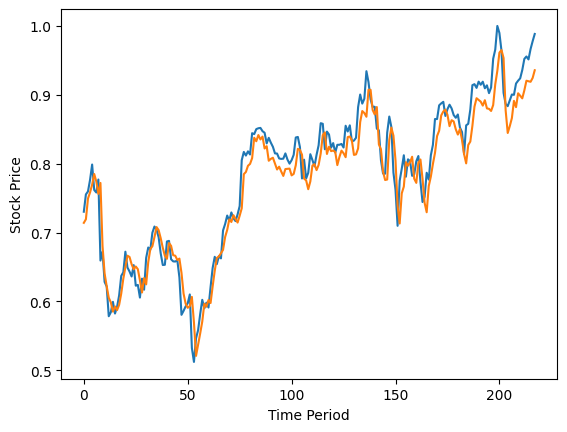

In [59]:
# Plot predictions
plt.plot(testY)
plt.plot(pred)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()

In [60]:
# scale 복원
print(testY[0], pred[0])

[0.73018021] [0.7140621]


In [61]:
minVec, maxVec

(array([ 494.652237,  495.97823 ,  487.562205, 7900.      ,  492.552239]),
 array([8.37809998e+02, 8.41950012e+02, 8.28349976e+02, 1.11649000e+07,
        8.35669983e+02]))

In [62]:
testY_origin = minVec[-1] + testY * (maxVec[-1] - minVec[-1])
pred_origin = minVec[-1] + pred * (maxVec[-1] - minVec[-1])

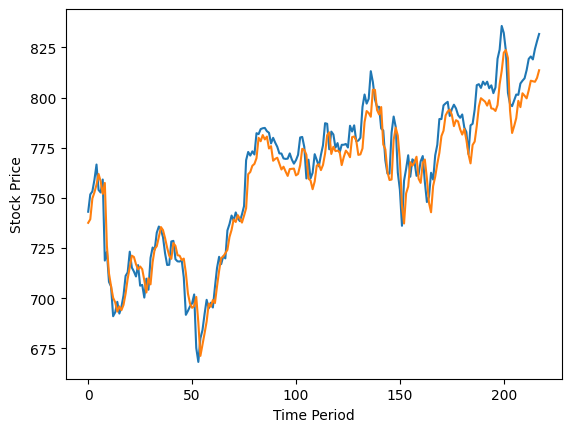

In [63]:
plt.plot(testY_origin)
plt.plot(pred_origin)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()

In [64]:
testY_origin[0], pred_origin[0]

(array([743.09002693]), array([737.55963], dtype=float32))

# 5. RNN_imdb_TF2

In [65]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models

In [66]:
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(x_train[0]) # This is a sequence of expressions of sentiment about a certain movie 

17464789/17464789 [==============================] - 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

In [67]:
maxlen=80
x_train = sequence.pad_sequences(x_train, maxlen=maxlen) # cutting last 80 words 
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [68]:
print(len(x_train[0]), x_train[0]) 

80 [  15  256    4    2    7 3766    5  723   36   71   43  530  476   26
  400  317   46    7    4    2 1029   13  104   88    4  381   15  297
   98   32 2071   56   26  141    6  194 7486   18    4  226   22   21
  134  476   26  480    5  144   30 5535   18   51   36   28  224   92
   25  104    4  226   65   16   38 1334   88   12   16  283    5   16
 4472  113  103   32   15   16 5345   19  178   32]


In [69]:
print(y_train[0])

1


In [70]:
x=layers.Input((maxlen,))
h=layers.Embedding(max_features, 128)(x)
h=layers.LSTM(128)(h)
y=layers.Dense(1, activation='sigmoid')(h)
model=models.Model(x,y)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
batch_size=32
epochs=3
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test performance: accuracy={0}, loss={1}'.format(acc, score))

Epoch 1/3
782/782 [==============================] - 190s 239ms/step - loss: 0.4283 - accuracy: 0.7995 - val_loss: 0.3698 - val_accuracy: 0.8408
Epoch 2/3
782/782 [==============================] - 192s 246ms/step - loss: 0.2778 - accuracy: 0.8882 - val_loss: 0.3792 - val_accuracy: 0.8328
Epoch 3/3
782/782 [==============================] - 40s 52ms/step - loss: 0.5007 - accuracy: 0.8225
Test performance: accuracy=0.8225200176239014, loss=0.5006626844406128


In [72]:
print(x_test[0], x_test[0].shape)

[   0    0    0    0    0    0    0    0    0    0    0    0    1  591
  202   14   31    6  717   10   10    2    2    5    4  360    7    4
  177 5760  394  354    4  123    9 1035 1035 1035   10   10   13   92
  124   89  488 7944  100   28 1668   14   31   23   27 7479   29  220
  468    8  124   14  286  170    8  157   46    5   27  239   16  179
    2   38   32   25 7944  451  202   14    6  717] (80,)


In [73]:
import numpy as np
testSample = np.expand_dims(x_test[0], axis=0) 
model.predict(testSample)


1/1 [==============================] - 0s 463ms/step


array([[0.04731321]], dtype=float32)

In [74]:
y_test[0]

0

# 6. MNIST_AE_CNN_TF2

In [75]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [76]:
(train_images, _), (test_images, _) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [77]:
noise_factor = 0.2
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

In [78]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

model.summary()

model.compile(optimizer='adadelta', loss='binary_crossentropy')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 32)      

In [80]:
model.fit(train_images_noisy, train_images_noisy,
                epochs=100,
                batch_size=128,
                shuffle=True,
                verbose = 2)

decoded_imgs = model.predict(test_images_noisy)

Epoch 1/100


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# 7. Colorization

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from skimage.io import imsave

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
X = np.load('/gdrive/My Drive/KICT_DL/AE/X.npy') # numpy array, gray Image
Y = np.load('/gdrive/My Drive/KICT_DL/AE/Y.npy') # color Image
test_X = np.load('/gdrive/My Drive/KICT_DL/AE/test_X.npy' ) # gray Image

print( X.shape ,Y.shape )
print( test_X.shape )

(190, 64, 64, 1) (190, 64, 64, 3)
(9, 64, 64, 1)


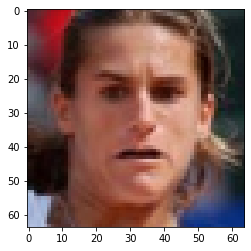

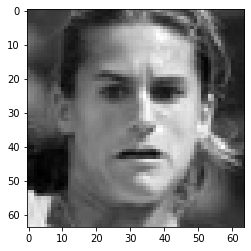

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(Y[0])
plt.show()
plt.imshow(X[0].reshape((64,64)), cmap='gray')
plt.show()

In [ ]:
dropout_rate = 0.5
DIMEN = 64
kernel_size = ( 4 , 4 )

NEURAL_SCHEMA = [
    layers.Conv2D( 32 , input_shape=( DIMEN , DIMEN , 1 ) , kernel_size=kernel_size , strides=1,activation='relu'),
    layers.Dropout( dropout_rate ) ,
    layers.Conv2D( 64, kernel_size=kernel_size, strides=1, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Conv2D( 128, kernel_size=kernel_size, strides=1, activation='relu') ,
    layers.Dropout(dropout_rate),
    layers.Conv2D( 256, kernel_size=kernel_size, strides=1, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Conv2DTranspose( 128, kernel_size=kernel_size, strides=1, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Conv2DTranspose( 64, kernel_size=kernel_size, strides=1, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Conv2DTranspose( 32, kernel_size=kernel_size, strides=1, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Conv2DTranspose( 3, kernel_size=kernel_size, strides=1, activation='tanh' ),
]

model = tf.keras.Sequential( NEURAL_SCHEMA )
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 61, 32)        544       
                                                                 
 dropout (Dropout)           (None, 61, 61, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 64)        32832     
                                                                 
 dropout_1 (Dropout)         (None, 58, 58, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 128)       131200    
                                                                 
 dropout_2 (Dropout)         (None, 55, 55, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 256)       5

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    loss='binary_crossentropy', metrics=['mae'])
model.fit(X,Y, batch_size=16, epochs=500,verbose = 2)
model.save("colorModel.h5")

Epoch 1/500
12/12 - 3s - loss: 3.5908 - mae: 0.4057
Epoch 2/500
12/12 - 2s - loss: 2.2950 - mae: 0.3365
Epoch 3/500
12/12 - 2s - loss: 1.5270 - mae: 0.2659
Epoch 4/500
12/12 - 2s - loss: 1.1988 - mae: 0.2454
Epoch 5/500
12/12 - 2s - loss: 1.0814 - mae: 0.2479
Epoch 6/500
12/12 - 2s - loss: 1.0085 - mae: 0.2410
Epoch 7/500
12/12 - 2s - loss: 0.9513 - mae: 0.2298
Epoch 8/500
12/12 - 2s - loss: 0.9131 - mae: 0.2217
Epoch 9/500
12/12 - 2s - loss: 0.8849 - mae: 0.2178
Epoch 10/500
12/12 - 2s - loss: 0.8611 - mae: 0.2154
Epoch 11/500
12/12 - 2s - loss: 0.8438 - mae: 0.2137
Epoch 12/500
12/12 - 2s - loss: 0.8278 - mae: 0.2139
Epoch 13/500
12/12 - 2s - loss: 0.8167 - mae: 0.2124
Epoch 14/500
12/12 - 2s - loss: 0.8061 - mae: 0.2083
Epoch 15/500
12/12 - 2s - loss: 0.7981 - mae: 0.2056
Epoch 16/500
12/12 - 2s - loss: 0.7898 - mae: 0.2038
Epoch 17/500
12/12 - 2s - loss: 0.7831 - mae: 0.2025
Epoch 18/500
12/12 - 2s - loss: 0.7773 - mae: 0.2016
Epoch 19/500
12/12 - 2s - loss: 0.7722 - mae: 0.2005
Ep

In [ ]:
img_array = np.load('/gdrive/My Drive/KICT_DL/AE/test_X.npy')
for i in range(9):
    img = img_array[i,:,:,:]
    img = img.reshape(64,64)
    imsave('/gdrive/My Drive/KICT_DL/AE/test_X'+str(i)+'.png', img)

values = model.predict( test_X )

for i in range( 9 ):
    image_final = ( values[i] * 255).astype( np.uint8 )
    imsave( '/gdrive/My Drive/KICT_DL/AE/'+'{}.png'.format( i + 1 ) , image_final  )

# img_array = np.load('/gdrive/My Drive/KICT_DL/AE/X.npy')
# print(img_array.shape)
# for i in range(6):
#     img = img_array[i,:,:,:]
#     img = img.reshape(64,64)
#     imsave('/gdrive/My Drive/KICT_DL/AE/X'+str(i)+'.png', img)

# img_array = np.load('/gdrive/My Drive/KICT_DL/AE/Y.npy')
# print(img_array.shape)
# for i in range(6):
#     img = img_array[i,:,:,:]
#     img = img.reshape(64,64,3)
#     imsave('/gdrive/My Drive/DeepLearning/AE/Y'+str(i)+'.png', img)

